## Task 3 - To Explore Unsupervised Machine Learning

In this task we are going to train the model on the *Iris* dataset and predict their optimum number of clusters!!

### Importing the libraries

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### Importing the Dataset

In [10]:
df = pd.read_csv("dataset/Iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### Data Preprocessing

In [11]:
df.drop('Id', axis = 1, inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [18]:
df.dropna().describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Preparing data for traing model

In [26]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [27]:
X.shape

(150, 4)

In [28]:
y.shape

(150,)

In [29]:
df.shape

(150, 5)

### The elbow method:

To find out the number of clusters in the given dataset we use elbow method.In this method, we pass various integer values, in a certain range to be selected as number of clusters.Then we can plot the output in the form of graph. The point at which the graph reaches the closest to the x-axis is the the optimum number of clusters possible.

In [33]:
from sklearn.cluster import KMeans
loss = []
for i in range(1,15):
    kmodel= KMeans(n_clusters=i)
    kmodel.fit(X)

    loss.append(kmodel.inertia_)

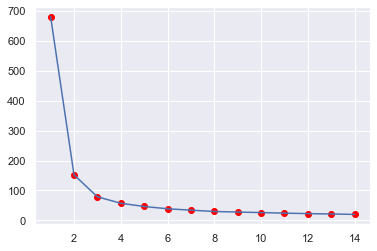

In [34]:
plt.scatter(range(1, 15), loss, color="red")
plt.plot(range(1, 15), loss)
plt.show()

The optimum clusters is where the elbow occur. The optimum number of clusters that can be formed in this dataset are "3"

In [41]:
# Applying KMeans with optimim numbers of clusters
kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=0)
y_kmeans = kmeans.fit_predict(X)

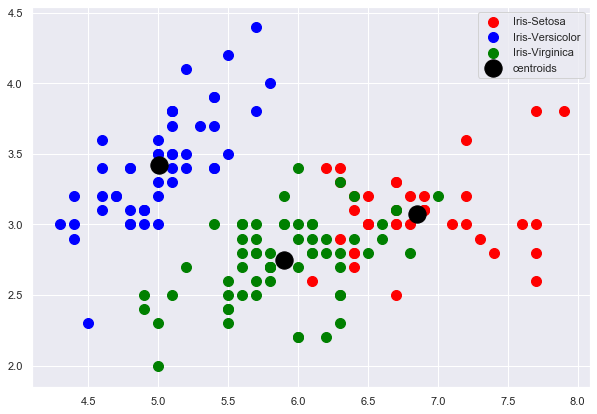

In [51]:
plt.figure(figsize=(10,7))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Iris-Setosa') 
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Iris-Versicolor') 
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Iris-Virginica') 

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='o',s=300,c='black',label='centroids') 
                                    
plt.legend()
plt.show()

### Thus from the above scatter plot we can say that optimum number of clusters for the IRIS dataset is 3.